## 🔵 Can we predict credit card fraud




Open program assignment

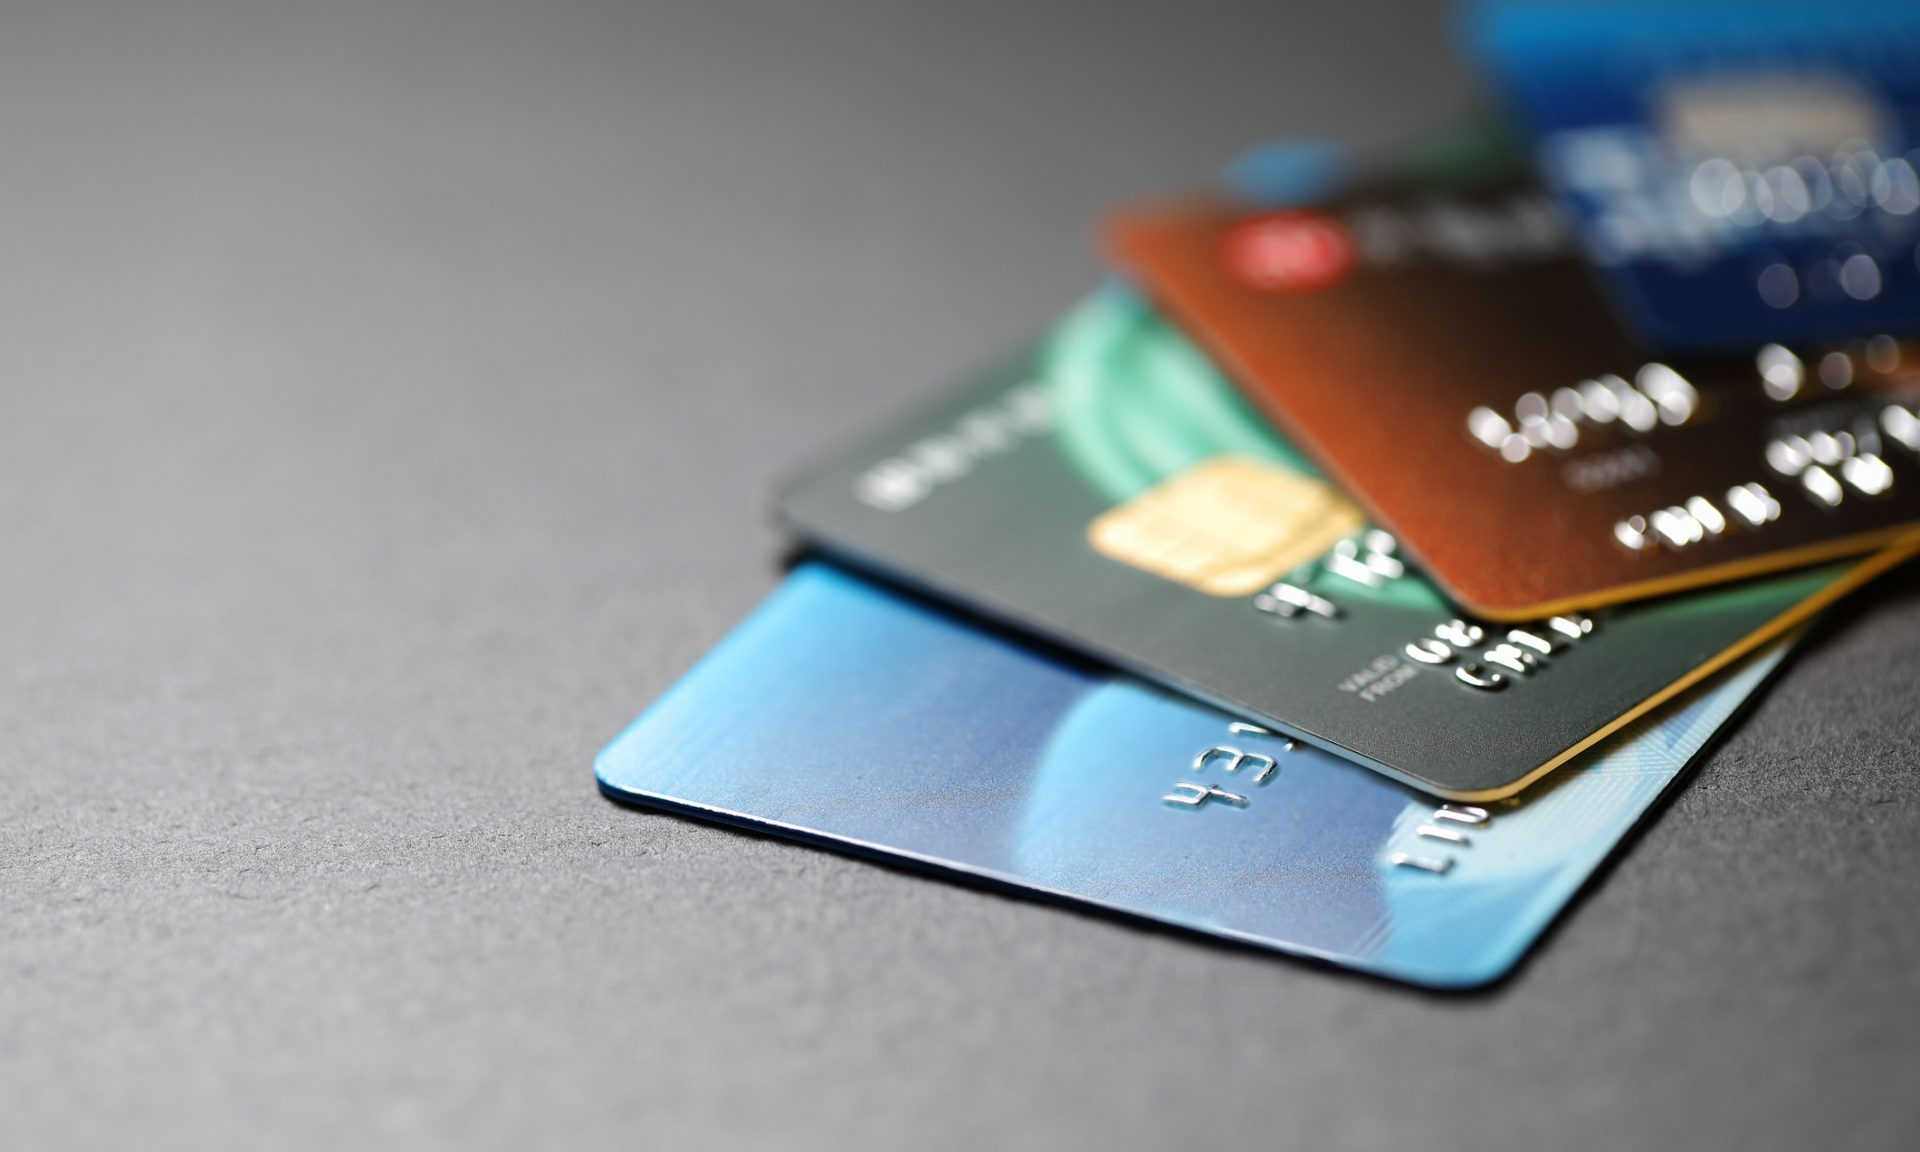

###### By Megin van Herk

In [91]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scikit-learn version:', sk.__version__)
print('matplotlib version:', matplotlib.__version__)

#sampling 
from imblearn.under_sampling import RandomUnderSampler  
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.model_selection import train_test_split # train-test split

#setting plot style
plt.style.use('seaborn-darkgrid')
%matplotlib inline

#removing warning
import warnings
warnings.filterwarnings("ignore")

# cross-validation
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

# supervised learning algorithms
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbbors
from sklearn.naive_bayes import GaussianNB # Gaussain Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.ensemble import BaggingClassifier # Bootstrap Aggregating Classifier

from sklearn.model_selection import GridSearchCV # grid search cross validation
from sklearn.model_selection import RandomizedSearchCV # randomized search cross validation

# metrics
import sklearn.metrics as metrics

numpy version: 1.20.3
pandas version: 1.3.4
scikit-learn version: 0.24.2
matplotlib version: 3.4.3


## 🔵 Index


🔷Domain understanding

🔹Data sourcing

🔹Analytic approach



🔷 Provisioning

🔹Data requirements

🔹Data collection

🔹Data understanding

🔹Data preperation



🔷 Predictions

🔹Preprocessing

🔹Modelling

🔹Evaluation

-------------------

# 🔷Domain understanding

The main part for domain understanding can be found in the project proposal document.

Credit card fraud is a problem well known to credit card holders. Preventing it usually involves just being carefull. But being able to recognize what is and what is not credit card fraud is already a difficult. Thousands of Transaction go through each day. Being able to known what is fraud can be very beneficial for allot of parties. 



### 🔹Data sourcing

Finding datasets that represent credit card fraud. It is important we have datasets that have both non-fraud and fraudulent data, so that our algortihm can see the difference and predict what is and what is not fraud.

For inital EDA I did some exploring of some possible datasets I found. I chose these datasets because they were the first 2 to show up with very different contents. And a reliable source. They both contain non-fraud and fraudulent data. One is completely censored due to privacy issues, all the columns have been scaled to numbers. the other dataset is not censored and contains various categorical data:

#### Credit card fraud dataset

This dataset contains only numeric data. It has very little cases of actual credit card fraud, it is very imbalanced. Most of the data is anonymous. It has the column “class” which 0 means no fraud and 1 means fraud. 
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


In [2]:
df = pd.read_csv("Data/creditcard.csv") #read the csv file
df #display top 5 rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


To get an inital impression of the content we show the intial rows of the dataframe.

In [3]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

There is very little amount of data for actual frauds. we will have to perform some sort of scaling to improve this.

#### Fraud detection dataset

This dataset contains more Categorical data Including peoples names ages and genders etc.This data consists of 2 different csv files that are “test” and “train”. This data is from customers in the US containing around 2 million rows.
https://www.kaggle.com/datasets/kartik2112/fraud-detection


In [4]:
#combining trian and test datasets
fraud = pd.concat([pd.read_csv('Data/fraudTrain.csv'),
                pd.read_csv('Data/fraudTest.csv')],
               ignore_index=True) #read the csv file
fraud.drop('Unnamed: 0',axis=1,inplace=True) #unnecessary column, it copied the index into another column
fraud.head(5) # display the top 5 rows

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
fraud.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

This data set has allot more catergorical data, including a time stamp, which could be used for time series algorithm. It also gives us longtitude and latidude, so we can plot some geographic data. This is probably so that we can compare the transactions lontitude latiude with the merch long and latidude, to see if the difference ein geolocation leads to fraud.

- merch_lat -> lattitude of the merchant
- merch_long -> longitude of merchant
- lat -> transaction lattitude
- long -> transaction longitude

It also gives us DOB, so we can compare if the age of card holders has any correlation with fraud or not.

- dob -> date of birth of card holder

In [6]:
fraud.is_fraud.value_counts()

0    1842743
1       9651
Name: is_fraud, dtype: int64

This data also has very little amount of data for actual frauds. This can affect the prediction outcome. we will have to perform some sort of scaling to improve this.

### I will use both datasets and see which one will get the better result in the end


I think comparing numerical data and catergorical datasets can be interesting to see which one yields a better result. I also feel like I will be able to show my skills well my doing both datasets, since they both need different approaches in the data preparation and preproccesing, I can try many things and showcase my skills.

# 🔹Analytic approach

In an analytic approach we decide the target variable and we find the nature of the problem.

Our <b>target variable</b> will be “is it credit card fraud or not?” 
This shows in dataset 1 as “class”= “1”or ”0”. In dataset 2 it is shown as “is_fraud”=”1”or ”0”.
1 meaning, yes there is credit card fraud.
0 meaning, no there is no credit card fraud.
Having a binary target variable will make certain predictions easier. and more accurate.


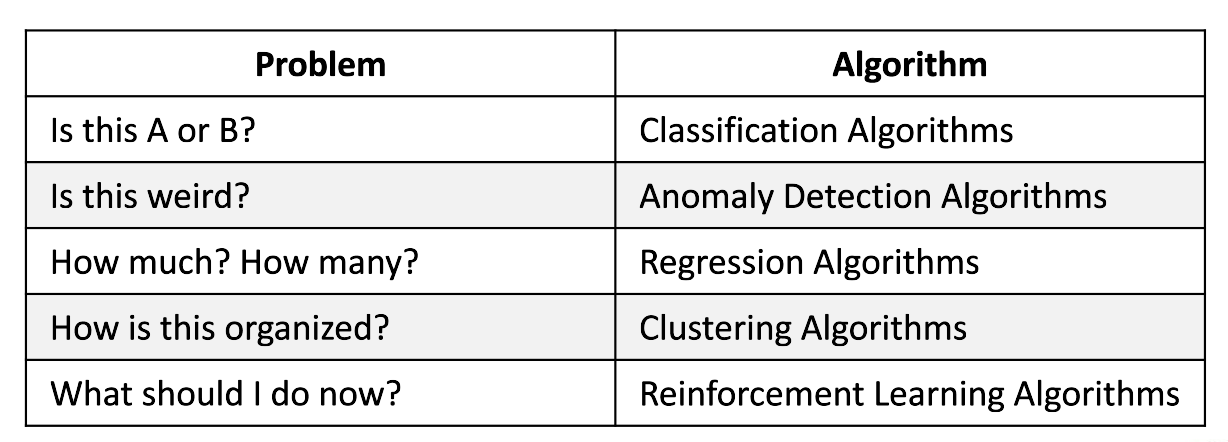

 Our problem is definitely “is this A or B” so a classification algorithm could be applied here. since our main research problem is “Is this credit card fraud or not?”
Other possible algorithms that could be used is the regression algorithm, we could rephrase the question and ask “how many credit card frauds were there/are there going to be?”. This would also then fit the regression algorithm.


specific algorithms I will try:

- Logistic regression
- KNN
- Random forest
- SVM


# 🔷 Provisioning

## 🔹Data requirements


The high level functions and capabilities of the domain start ofcourse at credit card fraud victims, to banks of the credit card fraud, untill entire countries economies can get affected.

###### ◽️ Stakeholders

People who could benefit of this research are:
- <b>Individual credit card holders</b>

  People who own a credit card and are afraid they're being scammed could benefit of this research. They could determine whether   or not they are experiencing credit card or not via this research.
  
  
- <b>Banks</b>

  Banks have many customers who can suffer from credit card fraud, they could use this research to secure their clients and
  possibly prevent credit card fraud. 
  
  
- <b>Companies</b>
  
  So who foots the bill when a thief uses your credit card or its number to illegally buy stuff? The short answer is it’s typically the merchant where you bought something or the bank that issued the credit card. It depends on the circumstances.

https://www.nerdwallet.com/article/credit-cards/merchants-victims-credit-card-fraud

###### ◽️ Required data elements

For the required data elements, ofcourse the data has to be readable. You have to be able to understand the data. Everything has to be logically organized. 

#### Data Dictionary
- trans_date_trans_time = Transaction time stamp
- cc_num = Credit card number
- merchant = merchant name
- category = transaction category
- amt = Transaction amount
- first = First name of card holder
- last = Last name of card holder
- gender = Sex of card holder
- street = transaction address
- city = transaction city
- state = transaction state
- zip = transaction zipcode
- lat = transaction lattitude
- long = transaction longitude
- city_pop = Population of the city
- job = job of the card holder
- dob = date of birth of card holder
- trans_num = transaction number of transaction
- unix_time = time in unix format
- merch_lat = lattitude of the merchant
- merch_long = longitude of merchant
- is_fraud = nature of transaction (fraud or not fraud)

#### Facts & Dimensions

We have allot of columns in our dataset its is good to know what is a facts and what is a dimension. It is a good to way to get to know your data and organize it.

Facts are usually something you are able to calculate.

◼️ Facts:

    ▪️ amt: Best example of a "fact" is the amount of money, in this case the amount of money they got scammed
    ▪️ unix_time: the unix time format is a more easier way to calculate time passed.
    
Most dimensions require to be organized, the best example of this is a date.
    
◻️ Dimensions:

    ▫️ trans_date_trans_time: The time/date is very important, you gather hierachy and grain and all kinds of important info
    ▫️ Longtitude and latitude : location is an important dimension, it accompanies a fact. Same for; Zip,City,State.
    ▫️ Job: knowing a person job is an interesting dimension and category to know. Same for:Name, gender and dob
    ▫️ category: is the transaction category, it is good to know in relation to the fact: amount.
    ▫️ is_fraud: Our target variable, the most important category
    

## 🔹Data collection

In this section we will focus on how we are going to collect the data

I have taken both datasets form their kaggle page:

- Dataset 1: Numercial data: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
- Dataset 2: Categorical Data: https://www.kaggle.com/datasets/kartik2112/fraud-detection

We currently have 2 datasets. 1 with mainly numercial data and the 2 with mainly categorical data. To keep things clear we name them so:


In [7]:
num = df #df is previous name of the dataset 1
num

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [8]:
cat = fraud #fraud is previous name of dataset 2
cat

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


## 🔹Data understanding

To be able to understand our data better, its better to view it a more familar envoirement instead if just tabular form. It is important to know what your data represents except for numbers. it can give you a clearer understanding of your domain. 

### ◼️ Data analyses

Here I am going to explain what is presented in the datasets

#### Dataset 1

we will analyse dataset 1 to see what we are dealing with in terms of data:

In [9]:
#determing the shape of the dataset
num.shape

(284807, 31)

This number shows the amount of rows (284807) and the amount of column (31)

In [10]:
num #showing the dataframe

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In this dataset all the columns from v1-v28 are censored details of individual cases. Censored meaning private banking details of people, including their name gender etc. The numbers mean the scaled data. The only columns remaining are "Amount" being the amount that was stolen, and "Class" which specifies if there was fraud(1) or not(0). and also the column "time"

In [11]:
num[['Amount','Class','Time']].describe()

,Amount,Class,Time
count,284807.000000,284807.000000,284807.000000
mean,88.349619,0.001727,94813.859575
std,250.120109,0.041527,47488.145955
min,0.000000,0.000000,0.000000
25%,5.600000,0.000000,54201.500000
50%,22.000000,0.000000,84692.000000
75%,77.165000,0.000000,139320.500000
max,25691.160000,1.000000,172792.000000


If we describe the 3 most important columns we can see that the the minimum amount is 0 dollar, and the most amount is 25691 dollars, with a mean of 88 dollars. We have a total of 284807 data entries, how many of those are fraud?

The column "time" goes from 0 untill 25691. Time contains the seconds elapsed between each transaction and the first transaction in the dataset

In [12]:
#let us check the percentage of fraudulent data points in our dataset
100*num.Class.value_counts(normalize=True)

0    99.827251
1     0.172749
Name: Class, dtype: float64

in dataset 1 only 0.17% of the data is fraudulent.

In [13]:
# Good No Null Values!
num.isnull().sum().max()

0

#### Dataset 2

Now we will analyse dataset 2 to see what we are dealing with.

In [14]:
#determing the shape of the dataset
cat.shape

(1852394, 22)

This number shows the amount of rows (1852394) and the amount of column (22)

In [15]:
cat.head(5) #showing the dataframe

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


This dataset contains allot of categorical, we can use allot of these columns to create easy to read visualization.

I will convert the column containing the date to datetime so we can extract more information out of this, such as the specific day and month, for later visualazation. Right now the date time is an object with no real information, when we convert it using pandas it becomes a datetime we can convert to other datetimes, such as the specific day.

In [16]:
#converting trans_date_trans_time into datetime
cat['trans_date_trans_time'] = pd.to_datetime(cat['trans_date_trans_time'])

Now that we have done that we can make more columns using datetime. For future graphs that will give us more information. So we take the inital transdate column and we take that timestamp and split it up into multiple colummns, Such as the specific weekday. If we take the transdate "2019-01-01 00:00:44" we know its the year 2019 and time somewhere in midnight, but we dont know what specific day it. By using pandas we can figure this out for each row in the dataset and make a seperate column. I do this for all the information I think is neccesary to know each value for the specific time, it is good informatio and for later visualization: Hour, Day, Month and year and month name. 

In [17]:
# making additonal columns from 'trans_date_trans_time'
# hour
cat['hour'] = cat['trans_date_trans_time'].dt.hour
#'day of the week'
cat['day'] = cat['trans_date_trans_time'].dt.day_name()
#'year_month'
cat['month_year'] = cat['trans_date_trans_time'].dt.to_period('M')
#only month name
cat['month'] = pd.to_datetime(cat['trans_date_trans_time']).dt.month_name()
#date time
cat['date_time'] = cat['trans_date_trans_time'].dt.to_period('M')


Now we have done that, I want to sort each weekday in chronological order. Later on the the visualization I will make graphs depiciting each weekday, to make this more readable its good to have them in order so you dont get confused. So we first create the order of the week in a variable, we will sort our rows to this variable. 

In [18]:
# Defining the order of the days of the week
day = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", 
          "Sunday"]

Here we sort the entire column "day" that we previously made out of the date time column using pandas. 

In [19]:
 # we sort the column weekdaystart to the variable day
cat['day'] = pd.Categorical(cat['day'], categories=day, ordered=True)

Now we show what we have done in the previous steps. If you scroll to the right you can see 4 new columns containing time related data.

In [20]:
cat.head(2) #only showing the first 2 rows as an example of all the rows without throwing too much information at you

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,day,month_year,month,date_time
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,January,2019-01
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,January,2019-01


We now made 4 new columns, "hour","day","month_year" and "month" with just the month name. we will use these later to make interesting graphs, giving us more insight into the domain

Also for this dataset we will check how much of the dataset is fraud so if our data is balanced or not.

In [21]:
#let us check the percentage of fraudulent data points in our dataset
100*cat.is_fraud.value_counts(normalize=True)

0    99.478999
1     0.521001
Name: is_fraud, dtype: float64

Also in this dataset 2, there is only a 0.52% of fraud in total, to make our prediction more accurate we will do some sort of scaling later in preproccesing. To not preduce a biased result. 

In [22]:
# Good No Null Values!
cat.isnull().sum().max()

0

### ◼️ Data visualization

####  Dataset 1

Now we will visualize dataset number 1. containing numeric data.

Now we will put our analyses to good use and make some visualizations of our data. 

First of all I would like to see what our "time" column actually means. We know the "0" value is the beginning and all the following numbers are seconds after this points.

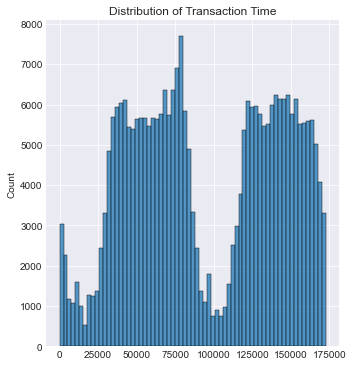

In [23]:
# Time
sns.displot(num['Time'].values)
plt.title('Distribution of Transaction Time');

Here we see the overall distribution of the time. it goes from o untill 175 000. This passing of time is in seconds. There are 86 400 seconds in a day. so we can assume:

In [24]:
175000/86400

2.025462962962963

This graph shows the time of 2 days. The distribution makes sense if you see the 2 high points, there are probably the day hours while the dips are the night hours. this means that there are more transaction during the day than in the evening.

Lets review the distribution of fraud and not fraud compared, to see if there are any pattern that could possibly affect our predicitions

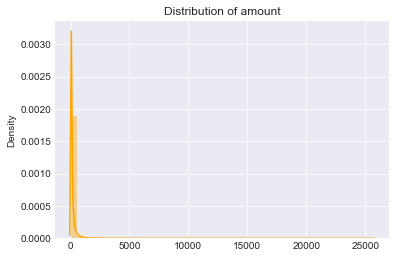

In [25]:
sns.distplot(num['Amount'].values , color = 'orange')
plt.title('Distribution of amount');

In this distribution graph we can see that there are allot of outliers. As previously noted in the data analyses, the minimum amount of fraud is "0" and the maximum amount is "25000". But the average is 88. this means that 25000 is an outlier. since the average is much lower. Most of the variables lie withing 0-100. In data preparations we will fix these outliers to prevent them affecting our prediction negatively

Now lets see if we can find a pattern between columns using scatterplot, since most of the columns are censored from v1-v27. Im going to randomly pass them through to see what we can find. First v=V7 and V17

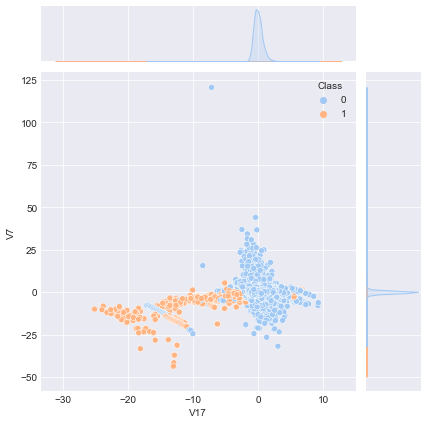

In [26]:
sns.jointplot(data=num, x="V17", y="V7", hue="Class",  palette="pastel")

This is a suprisingly good scatterplot. We can clearly see the difference between "0" and "1". A plot like this shows us that performing KNN on this dataset will be very effective, since knn groups by 5 surrounding neighbors to make predictions and in this graph you can clearly tell what side is what and taking the 5 nearest neigbors will probably get a good result in accuracy.

Now we will try another random numbers

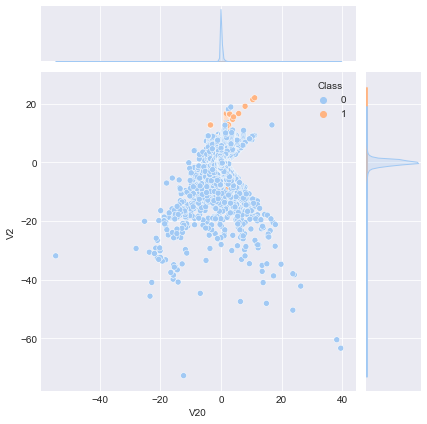

In [27]:
sns.jointplot(data=num, x="V20", y="V2", hue="Class",  palette="pastel")

So in this plot it shows that there are not allot of fraudulent cases. But the ones that are depicted show that they group together, again proving that nearest neighbor would work very well in this dataset.

Lets compare a couple of the "V" columns together, to see if our presumption that the fraud and the non-fraud will always be grouped together.

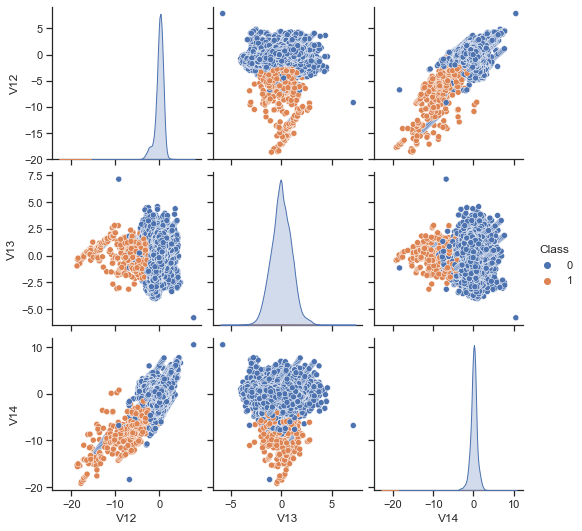

In [28]:
sns.set(style="ticks")
sns.pairplot(num[["V12","V13","V14","Class"]], hue="Class")

This clearly shows the fraud and non-fraud are grouped together. Making these columns perfect for KNN. 

#### Dataset 2

Now we will visualize dataset number 2. containing categorical data

Exploring the time data:

Lets visualize the transaction date and time to see if there is a pattern. that could be of benefit for us in making predictions. its also good to see the reach of our dataset timewise:

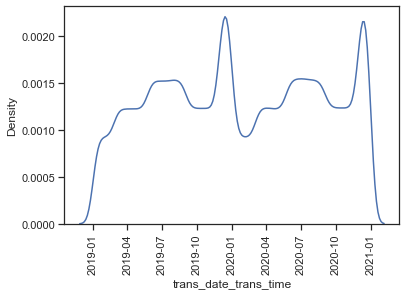

In [29]:
# let's analyze the the date when maximum frauds have happened
sns.kdeplot(cat.trans_date_trans_time)
plt.xticks(rotation = 90)
plt.show()

we can see 2 clear spikes. later on in both 2019 and 2020, this is most likely due to the holiday season having spikes in transactions, when people buy more things for gifts during the holiday season.

First I would like to see all the weekdays compared to amount of frauds, to see if there is a correlation:

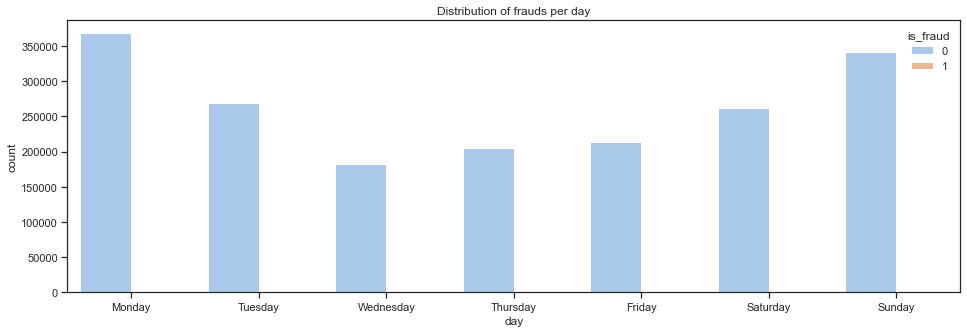

In [30]:
plt.figure(figsize=(16,5))
sns.countplot(x="day", data=cat, hue="is_fraud",
            palette="pastel")
plt.title('Distribution of frauds per day');

This graph shows the distribution of data entries for each day of the week, monday has the most amount of transactions, probably because credit card automatic transactions go through on mondays. Other than that, because our data is very imbalanced, you cant really tell when the most frauds occur. will scale our data later

now I want to visualize each hour of the day. to see if there are any patterns.

[Text(0.5, 1.0, 'Weekday compared to hours')]

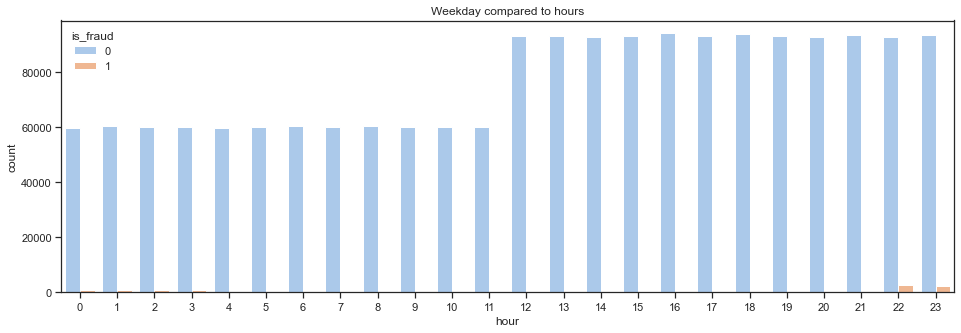

In [31]:
plt.figure(figsize=(16,5))
sns.countplot(x="hour", data=cat,hue="is_fraud",
            palette="pastel").set(title='Weekday compared to hours')

Here is shows that in the afternoon most transactions start. which makes sense, people dont usually buy things in the morning. 

Now lets see if there are any noticable things when we show the distribution per month

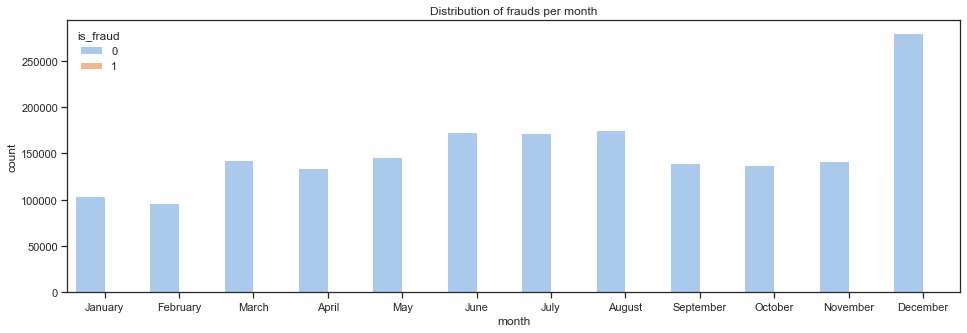

In [32]:
plt.figure(figsize=(16,5))
sns.countplot(x="month", data=cat,hue="is_fraud",
            palette="pastel")
plt.title('Distribution of frauds per month');

We can tell most people make transactions during december, for it is the holiday season. other than that the fluctuation isnt that much.

Id like to see the total combined timeline, for this we need to group the time with the amount of cutomers per year month. so we create a new temporary datafram just for this graph. 

In [33]:
df_fraud_transactions =cat[cat['is_fraud']==1]
# we group by month_year and cc_num, we dont group by name because certain numbers have double entries, each credit card number is unique.
df_timeline02 = cat.groupby(cat['month_year'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline02.columns = ['year_month','num_of_fraud_transactions','fraud_customers']
df_timeline02

,year_month,num_of_fraud_transactions,fraud_customers
0,2019-01,52525,913
1,2019-02,49866,918
2,2019-03,70939,916
3,2019-04,68078,913
4,2019-05,72532,910
5,2019-06,86064,908
6,2019-07,86596,910
7,2019-08,87359,911
8,2019-09,70652,913
9,2019-10,68758,912


We then plot the lineplot using the count column of fraud customers. This gives a better overview than the previous lineplot we made because we filter speficily on the amount of customer actually experiencing fraud instead of just total transactions.

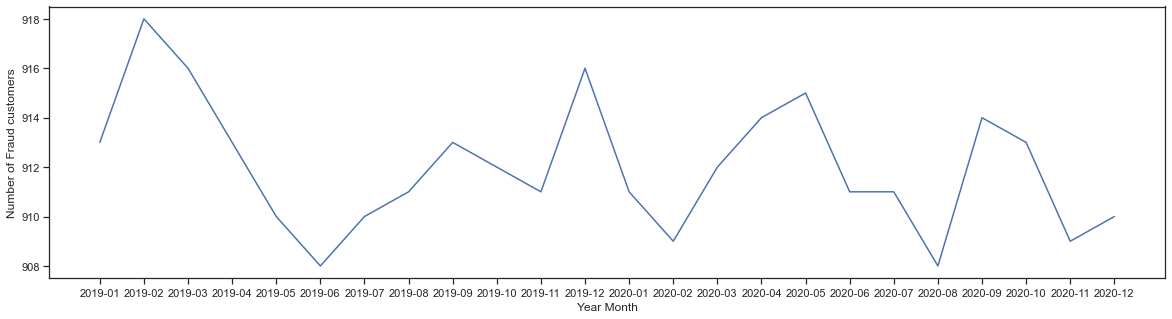

In [34]:
x = np.arange(0,len(df_timeline02),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline02['fraud_customers'])#we take the column previously made, this column takes the count of fraud customers
ax.set_xticks(x)
ax.set_xticklabels(df_timeline02['year_month']) #we take each month and year for the x label
ax.set_xlabel('Year Month')
ax.set_ylabel('Number of Fraud customers')
plt.show()

In the previous timeline plot we saw two peaks at the end of each year, this was a peak in transaction due to the holiday season. In this graph we show specific fraud transactions. We can see that those peaks are still visible within fraudulent cases, The amount of cases goes down in the summer and goes up getting closer to the holiday season.

Lets visualize the gender distribiution throughout different times. and see if we can find some interesting information

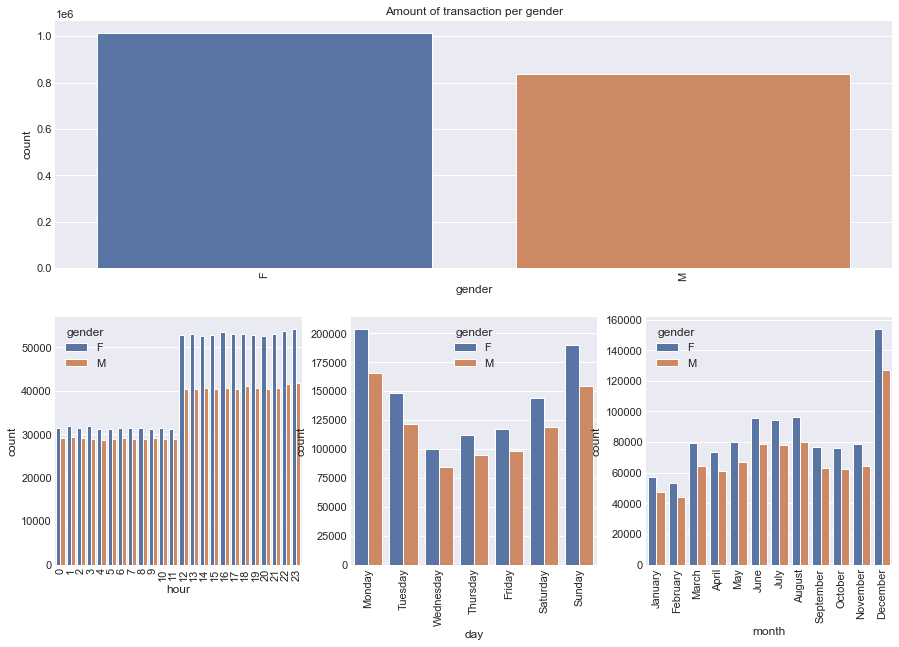

In [92]:
fig, ax = plt.subplots(figsize=(15,10))

plot = [0,0,0,0]
#plot gender
plot[0] = sns.countplot(cat.gender, ax=plt.subplot(211))
plt.title("Amount of transaction per gender")
#plot gender in comparison with time
plot[1] = sns.countplot(cat.hour, hue=cat.gender, ax=plt.subplot(234))#plot 1
plot[2] = sns.countplot(cat.day, hue=cat.gender, ax=plt.subplot(235))#plot 2
plot[3] = sns.countplot(cat.month, hue=cat.gender, ax=plt.subplot(236))#plot 3

for i in plot:
  i.set_xticklabels(i.get_xticklabels(), rotation=90) #rotate the x labels 90 degrees

plt.show()

Here we can see that females have more transactions, therefor they have a higher chance of fraud. This doesnt mean that females hvae a higher chance of fraud in general, its just that women shop more, therefor its logical that they get more fraud. 
Also interesting to see is in graph 4 for the distribution for each month, that december has the highest count, this is probably due to the holiday season, which gives opputunity for more fraud, since most peope do more transaction for gifts.

Lets see how the distribution of the age data is. We dont actually have a column for age, we only have the column "DOB" aka, date of birth. We can create a new column by subtracting the DOB with the transaction month and year, to get the age of the customer on the day of the transaction:

In [36]:
dob = cat[['dob']]
cat['yeardob'] = pd.to_datetime(cat['trans_date_trans_time']).dt.month
cat['year'] = pd.to_datetime(cat['trans_date_trans_time']).dt.month


In [37]:
cat["yeardob"] =cat["yeardob"].astype(int)
cat["year"] = cat["year"].astype(int)


In [38]:
trans = cat['yeardob']- cat['year'] 
cat[['transactiontime']] = trans

ValueError: Columns must be same length as key

Geolocation:

Even tho I don think im going to use the geolocation in my predictions, I still want to visualize the longtitude and latitude. To create a nice visual of the map of america:

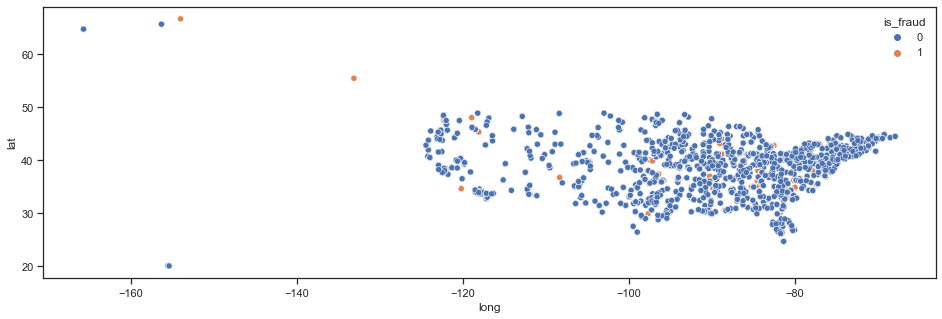

In [39]:
plt.figure(figsize=(16,5))
p = sns.scatterplot(data=cat, x="long", y="lat", hue="is_fraud")

Here we plot the long and lat of the transactions. This creates a map in the shape of american. the outlier here are probably alaska and hawaii. You can tell its most dense around the east coast, this means that there are more transactions here.

We will explore further by going into the specific category of each transaction. To see if there is a pattern or which category has the most fraud. but first we will see which category has the most amount of losses:

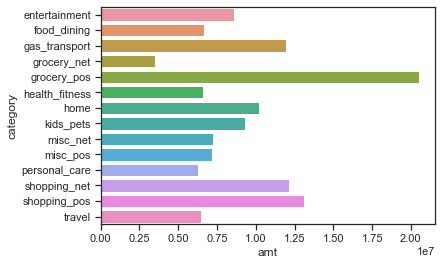

In [40]:
# Let's see in which category the losses are huge
data_cat = cat.groupby(by = "category").sum()
sns.barplot(y = data_cat.index,x=data_cat.amt)
plt.show()

Here we see that grocery_pos has the most amount of money stolen. grocery pos means that the transaction was not made via the internet. This is probably the case because when people get scammed online they scammers usually take small amounts of money to not alarm the consumer, when physical interaction occur people usually steal the credit card and then take as much money as they can get.

Now we will see which specific category has the most fraud in total

[Text(0.5, 1.0, 'Number of frauds by category')]

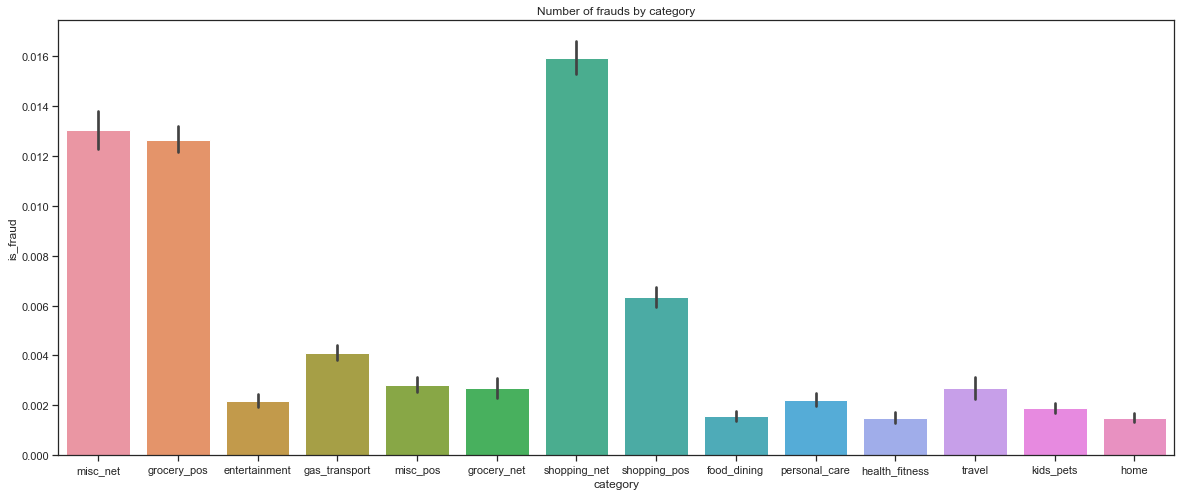

In [41]:
plt.figure(figsize=(20,8))
a = sns.barplot(x="category", y='is_fraud' ,data=cat)

a.set(title='Number of frauds by category')  

Here we can see that online shopping has the most instances of fraud. this means that most fraud happens online.

In [42]:
cat.job.unique()

array(['Psychologist, counselling', 'Special educational needs teacher',
       'Nature conservation officer', 'Patent attorney',
       'Dance movement psychotherapist', 'Transport planner',
       'Arboriculturist', 'Designer, multimedia',
       'Public affairs consultant', 'Pathologist', 'IT trainer',
       'Systems developer', 'Engineer, land', 'Systems analyst',
       'Naval architect', 'Radiographer, diagnostic',
       'Programme researcher, broadcasting/film/video', 'Energy engineer',
       'Event organiser', 'Operational researcher', 'Market researcher',
       'Probation officer', 'Leisure centre manager',
       'Corporate investment banker', 'Therapist, occupational',
       'Call centre manager', 'Police officer',
       'Education officer, museum', 'Physiotherapist', 'Network engineer',
       'Forensic psychologist', 'Geochemist',
       'Armed forces training and education officer',
       'Designer, furniture', 'Optician, dispensing',
       'Psychologist, forensic

I dont think jobs are important, there are too many jobs and I dont think there will be a correlation between fraud or not 

## 🔹Data preperation


In this section we prepare the data, We select the features we want to use and make sure they are numerical and usable for the preprocessing phase of modelling.

#### Dataset 1

In data preparation we prepare the data for modeling, we usually clean the dataset when neccesary and deal with missing values. Since dataset number 1 is already mainly numeric data. there is not much cleaning we can do.

In [43]:
num.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


There are also no null values

In [44]:
num.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### Dataset 2

I will now prepare dataset 2 with the categorical data. SInce most of the columns contain categorical data, we cant use these for our predictions. I will try to make most of the columns numerical for better predictions:

Before I waste my previous time on making everything numerical I will select the features I actually want to use.

In [45]:
cat.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'hour', 'day', 'month_year', 'month',
       'date_time', 'yeardob', 'year'],
      dtype='object')

#### Keeping:
- amt, the amount could have a significant impact on fraudulent data, so I will keeping this column
- category of the transaction could have an impact on fraud
- gender is easily turned numerical, and has an impact on fraud
- is_fraud ofcourse I'll keep, its our target variable

#### Dropping:
- trans date and time is very handy, but currently I am not doing a time series so we dont really need it.
- CC_num is the specific credit card number, which is not neccesary in making predictions
- Mechant name isnt important
- card holder name isnt important
- location data isnt important enough to keep. it might show an impact but ill keep it out for now.
- there are too many jobs to turn into numerical data, I will leave it for now


I will select the columns into a new dataframe

In [46]:
cat1 = cat[['amt','is_fraud','gender','category']]

Lets turn gender into binary, female = "0", male = "1".

In [47]:
cat1.gender[cat1.gender == 'M'] = 0
cat1.gender[cat1.gender == 'F'] = 1
cat1

,amt,is_fraud,gender,category
0,4.97,0,1,misc_net
1,107.23,0,1,grocery_pos
2,220.11,0,0,entertainment
3,45.00,0,0,gas_transport
4,41.96,0,0,misc_pos
...,...,...,...,...
1852389,43.77,0,0,health_fitness
1852390,111.84,0,0,kids_pets
1852391,86.88,0,1,kids_pets
1852392,7.99,0,0,travel


Now for the category, there are too many columns. So I think splitting all the categories into different columns and giving them the "has" or "has not" also known as our lovely binary "0" and "1". I will be using pandas, get dummies, to make this happen. get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables. Indicator variables meaning, a variable with just two possible values, sometimes represented by the symbols 0 and 1.

In [48]:
cat_final = pd.get_dummies(cat1,columns=['category'],drop_first=True)
cat_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   amt                      float64
 1   is_fraud                 int64  
 2   gender                   object 
 3   category_food_dining     uint8  
 4   category_gas_transport   uint8  
 5   category_grocery_net     uint8  
 6   category_grocery_pos     uint8  
 7   category_health_fitness  uint8  
 8   category_home            uint8  
 9   category_kids_pets       uint8  
 10  category_misc_net        uint8  
 11  category_misc_pos        uint8  
 12  category_personal_care   uint8  
 13  category_shopping_net    uint8  
 14  category_shopping_pos    uint8  
 15  category_travel          uint8  
dtypes: float64(1), int64(1), object(1), uint8(13)
memory usage: 65.4+ MB


Now we have all the columns we need and as you can see:


In [49]:
cat_final.head()

,amt,is_fraud,gender,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,107.23,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,220.11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,45.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,41.96,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


All the data is numerical. Now we can use it to start modelling, in the following step "preprocessing" we will scale and balance the dataset. Because right now our dataset is still very unbalanced, which might influence our prediction negatively

# 🔷 Predictions

## 🔹Preprocessing

In this section we will prepare data. We will clean it where neccesary

# Dataset 1

Standardization of a dataset is a common requirement for many machine learning estimators. Typically this is done by removing the mean and scaling to unit variance. However, outliers can often influence the sample mean / variance in a negative way. In such cases, the median and the interquartile range often give better results. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

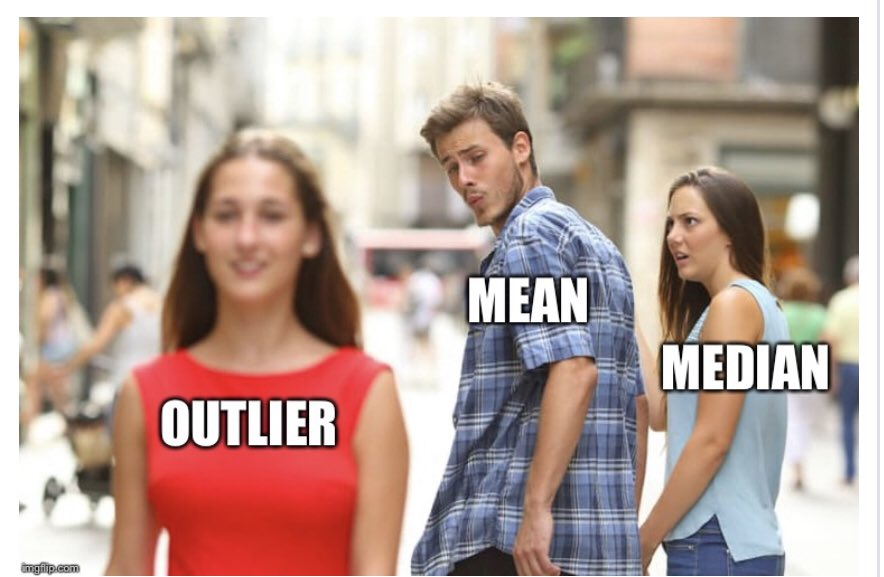

We scale our dataset because our data is very unbalanced, We have too many "0" not fraud. We have to balance this our to make sure that our predictions arent biased. first we import the robust scaler. Then we scale our 2 non scaled columns:

In [50]:
from sklearn.preprocessing import RobustScaler

# RobustScaler is less prone to outliers.
RobScaler = RobustScaler()

scaled_amount = RobScaler.fit_transform(num['Amount'].values.reshape(-1,1)) 
scaled_time = RobScaler.fit_transform(num['Time'].values.reshape(-1,1))

Since most of the data we got in the first place was already scaled for privacy issues, we dont need to scale them again. First we will scale "Amount" and "Time". We then replace the old columns with the new columns containing the scaled data.

In [51]:
# replace the unscaled columns with its scaled values
num.drop(['Time','Amount'], axis=1, inplace=True)
num.insert(0 , 'scaled_amount' , scaled_amount)
num.insert(1 , 'scaled_time' , scaled_time)

num

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-0.296653,1.034951,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,0.038986,1.034963,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,0.641096,1.034975,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,-0.167680,1.034975,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0


Now we will balance the dataset. making sure we have the equal amount of "0" , "1". This will greatly reduce our amount of data entries, but it will make our prediction more accurate, since we will not have a more biased prediction towards "0" since we have more data of that.

In [52]:
# under Sampling
X = num.drop('Class' , axis = 1)
y = num['Class']
RUS = RandomUnderSampler(random_state=42) # Supports multi-class resampling by sampling each class independently
X_rus, y_rus = RUS.fit_resample(X,y)
df_rus = pd.concat([X_rus ,y_rus]  , axis = 1)

Our original dataset shape

In [53]:
num.shape

(284807, 31)

After scaling and under sampling

In [54]:
df_rus.shape

(984, 31)

You can see our number of rows has decreased allot, we went from 284k rows to not even 1k

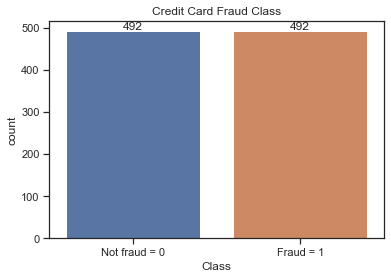

In [55]:
# show Class count again for the under sampling data
ax = sns.countplot(y_rus)
plt.title('Credit Card Fraud Class');
ax.bar_label(ax.containers[0])
ax.set_xticklabels(['Not fraud = 0', 'Fraud = 1']);

Now lets see if our correlation has improved with this:

Text(0.5, 1.0, 'balanced Correlation Matrix')

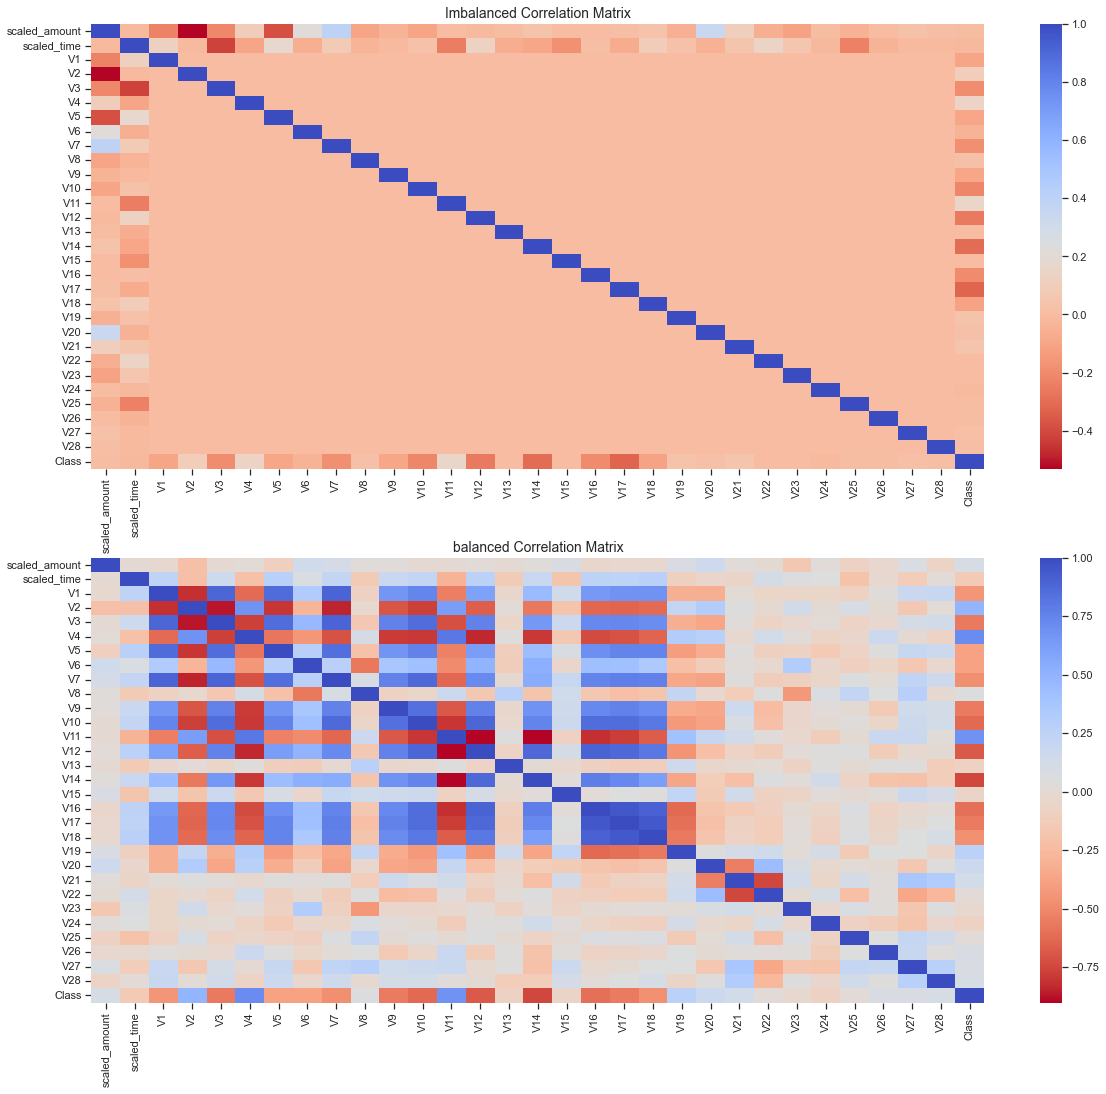

In [56]:
 f, ax = plt.subplots(2, 1, figsize=(20,18))

# Imbalanced Correlation Matrix for original data
sns.heatmap(num.corr() , cmap = 'coolwarm_r' , ax= ax[0] )
ax[0].set_title('Imbalanced Correlation Matrix' , fontsize=14)

# balanced Correlation Matrix for under sampling data
sns.heatmap(df_rus.corr() , cmap = 'coolwarm_r' , ax= ax[1])
ax[1].set_title('balanced Correlation Matrix' , fontsize=14)

We can see we have allot more correlations with our balanced data. Especially in the center, before resampling the entire heatmap was 0.0, now we have correlation to 0.75.




We split the data into test and train for the modelling

In [57]:
X = df_rus.drop('Class',axis=1) #we take all the columns for x
y = df_rus['Class'] #our target variable.

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42) #making sure we dont double up the test by specifing test1 and test2

To make sure our dataset is not overfitting or underfitting, we will do Bias/variance trade-off. 


### Bias/variance trade-off

Now we are ready for modelling!

# Dataset 2

In [58]:
X_df = cat_final.drop('is_fraud',axis=1)#we take all the columns for x
y_df = cat_final['is_fraud']#our target variable.
# under Sampling
RUS = RandomUnderSampler(random_state=42) # Supports multi-class resampling by sampling each class independently
X_rus2, y_rus2 = RUS.fit_resample(X_df,y_df)
df_rus2 = pd.concat([X_rus2 ,y_rus2]  , axis = 1)

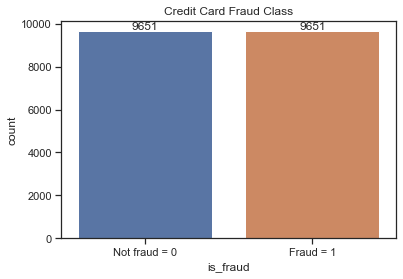

In [59]:
# show is_fraud count again for the under sampling data
ax = sns.countplot(y_rus2)
plt.title('Credit Card Fraud Class');
ax.bar_label(ax.containers[0])
ax.set_xticklabels(['Not fraud = 0', 'Fraud = 1']);

Text(0.5, 1.0, 'balanced Correlation Matrix')

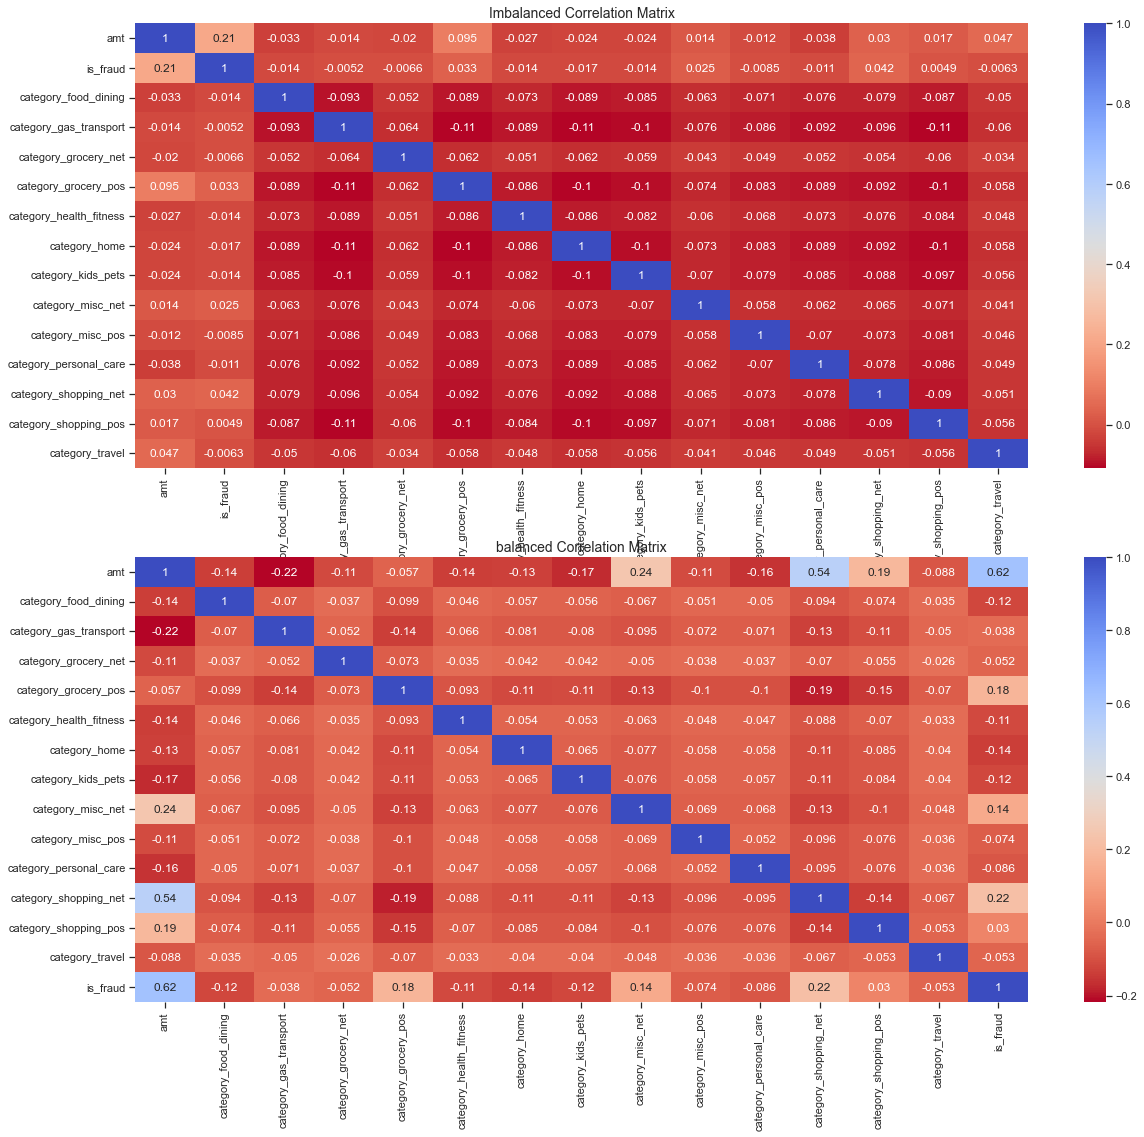

In [60]:
f, ax = plt.subplots(2, 1, figsize=(20,18))

# Imbalanced Correlation Matrix for original data
sns.heatmap(cat_final.corr() , cmap = 'coolwarm_r' , ax= ax[0] ,annot=True)
ax[0].set_title('Imbalanced Correlation Matrix' , fontsize=14)

# balanced Correlation Matrix for under sampling data
sns.heatmap(df_rus2.corr() , cmap = 'coolwarm_r' , ax= ax[1],annot=True)
ax[1].set_title('balanced Correlation Matrix' , fontsize=14)

The difference between the 2 heatmaps isnt that big unfortunately. The correlations do go up a little in center, we can see the squares got slightly lighter. Other than that, on the sides of the heatmap2 we can tell that some categories have gone up in correlation, such as "category_shopping_net" went from 0.03 to 0.54. We can use this column in our modelling .

In [61]:
X2 = df_rus2.drop('is_fraud',axis=1) #we take all the columns for x
y2 = df_rus2['is_fraud'] #our target variable.

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42) #making sure we dont double up the test by specifing test1 and test2

Now we are ready for modelling!

## 🔹Modelling

In this step we evaluate our models. We use different methods to try improve the performance

# Dataset 1

### KNN

In [77]:
# param_grid – A dictionary with parameter names as keys and lists of parameter values
parameter_grid = {'n_neighbors': range(1,15)}
clf = RandomizedSearchCV(KNeighborsClassifier(), parameter_grid)
clf.fit(X_train1,y_train1)
clf_pred = clf.predict(X_test1)

In [78]:
### Determining the number of neighbors using RandomizedSearchCV
parameter_grid = {'n_neighbors': range(1,5)}
knn = RandomizedSearchCV(KNeighborsClassifier(), parameter_grid, verbose=4)
knn.fit(X_train1,y_train1)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.949 total time=   0.0s
[CV 2/5] END .....................n_neighbors=1;, score=0.913 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=0.906 total time=   0.0s
[CV 4/5] END .....................n_neighbors=1;, score=0.949 total time=   0.0s
[CV 5/5] END .....................n_neighbors=1;, score=0.949 total time=   0.0s
[CV 1/5] END .....................n_neighbors=2;, score=0.957 total time=   0.0s
[CV 2/5] END .....................n_neighbors=2;, score=0.957 total time=   0.0s
[CV 3/5] END .....................n_neighbors=2;, score=0.913 total time=   0.0s
[CV 4/5] END .....................n_neighbors=2;, score=0.927 total time=   0.0s
[CV 5/5] END .....................n_neighbors=2;, score=0.934 total time=   0.0s
[CV 1/5] END .....................n_neighbors=3;, score=0.964 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3;,

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': range(1, 5)}, verbose=4)

In [79]:
# showing best parameter
knn.best_params_

{'n_neighbors': 3}

In [80]:
from sklearn.metrics import confusion_matrix, classification_report # classification metrics
knn_pred1 = knn.predict(X_test1)

print(classification_report(y_test1,knn_pred1))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       150
           1       0.96      0.91      0.94       146

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



In [81]:
metrics.accuracy_score(y_test1, knn_pred1)

0.9391891891891891

## Decision tree

In [88]:
dt = DecisionTreeClassifier()
dt.fit(X_train1,y_train1)

DecisionTreeClassifier()

In [90]:
dt_pred1 = dt.predict(X_test1)
print(classification_report(y_test1,dt_pred1))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       150
           1       0.92      0.88      0.90       146

    accuracy                           0.90       296
   macro avg       0.90      0.90      0.90       296
weighted avg       0.90      0.90      0.90       296



# Dataset 2

### KNN

In [62]:
# param_grid – A dictionary with parameter names as keys and lists of parameter values
parameter_grid = {'n_neighbors': range(1,15)}
clf = RandomizedSearchCV(KNeighborsClassifier(), parameter_grid)
clf.fit(X_train2,y_train2)
clf_pred = clf.predict(X_test2)

In [63]:
### Determining the number of neighbors using RandomizedSearchCV
parameter_grid = {'n_neighbors': range(1,5)}
knn = RandomizedSearchCV(KNeighborsClassifier(), parameter_grid, verbose=4)
knn.fit(X_train2,y_train2)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.946 total time=   0.0s
[CV 2/5] END .....................n_neighbors=1;, score=0.944 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=0.943 total time=   0.0s
[CV 4/5] END .....................n_neighbors=1;, score=0.940 total time=   0.0s
[CV 5/5] END .....................n_neighbors=1;, score=0.949 total time=   0.0s
[CV 1/5] END .....................n_neighbors=2;, score=0.940 total time=   0.0s
[CV 2/5] END .....................n_neighbors=2;, score=0.937 total time=   0.0s
[CV 3/5] END .....................n_neighbors=2;, score=0.939 total time=   0.0s
[CV 4/5] END .....................n_neighbors=2;, score=0.939 total time=   0.0s
[CV 5/5] END .....................n_neighbors=2;, score=0.947 total time=   0.0s
[CV 1/5] END .....................n_neighbors=3;, score=0.949 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3;,

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': range(1, 5)}, verbose=4)

In [64]:
# showing best parameter
knn.best_params_

{'n_neighbors': 4}

In [65]:
from sklearn.metrics import confusion_matrix, classification_report # classification metrics
knn_pred2 = knn.predict(X_test2)

print(classification_report(y_test2,knn_pred2))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2895
           1       0.95      0.94      0.95      2896

    accuracy                           0.95      5791
   macro avg       0.95      0.95      0.95      5791
weighted avg       0.95      0.95      0.95      5791



In [66]:
metrics.accuracy_score(y_test2, knn_pred2)

0.9468140217579002

### Decision tree

In [67]:
dt = DecisionTreeClassifier()
dt.fit(X_train2,y_train2)

DecisionTreeClassifier()

In [68]:
dt_pred2 = dt.predict(X_test2)
print(classification_report(y_test2,dt_pred2))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2895
           1       0.95      0.95      0.95      2896

    accuracy                           0.95      5791
   macro avg       0.95      0.95      0.95      5791
weighted avg       0.95      0.95      0.95      5791



In [69]:
metrics.accuracy_score(y_test2, dt_pred2)

0.9483681574857538

## 🔹Evaluation

###### Dataset 1

In [87]:
np.mean(cross_val_score(knn, X_test1, y_test1, cv=3))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .....................n_neighbors=1;, score=1.000 total time=   0.0s
[CV 2/5] END .....................n_neighbors=1;, score=0.950 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=0.949 total time=   0.0s
[CV 4/5] END .....................n_neighbors=1;, score=0.923 total time=   0.0s
[CV 5/5] END .....................n_neighbors=1;, score=0.897 total time=   0.0s
[CV 1/5] END .....................n_neighbors=2;, score=0.975 total time=   0.0s
[CV 2/5] END .....................n_neighbors=2;, score=0.875 total time=   0.0s
[CV 3/5] END .....................n_neighbors=2;, score=0.949 total time=   0.0s
[CV 4/5] END .....................n_neighbors=2;, score=0.974 total time=   0.0s
[CV 5/5] END .....................n_neighbors=2;, score=0.897 total time=   0.0s
[CV 1/5] END .....................n_neighbors=3;, score=1.000 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3;,

0.905414691128977

In [84]:
cm3 = confusion_matrix(y_test1,knn_pred1)

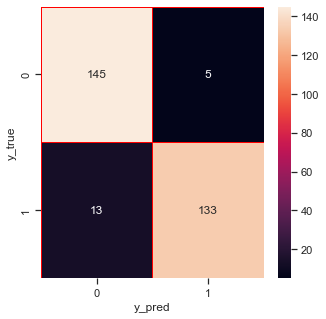

In [85]:
#confusion matrix visualization

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm3,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Conclusion:

- The confusion matrix shows 145 + 133 = 278 correct predictions and 13+5=18 incorrect ones.
- The accuracy score of the metrics is 93.9%.
- The main Cross validation score is 90.5%.

###### Dataset 2

### Random forest  cross-validation and confusion matrix

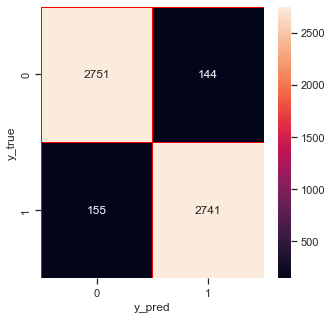

In [70]:
cm22 = confusion_matrix(y_test2,dt_pred2)

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm22,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [71]:
print(cross_val_score(dt, X_test2, y_test2, cv=3))

[0.94562403 0.95181347 0.94507772]


In [72]:
np.mean(cross_val_score(dt, X_test2, y_test2, cv=3))

0.947505163011639

### KNN cross-validation and confusion matrix

In [73]:
print(cross_val_score(knn, X_test2, y_test2, cv=3))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.930 total time=   0.0s
[CV 2/5] END .....................n_neighbors=1;, score=0.938 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=0.944 total time=   0.0s
[CV 4/5] END .....................n_neighbors=1;, score=0.931 total time=   0.0s
[CV 5/5] END .....................n_neighbors=1;, score=0.925 total time=   0.0s
[CV 1/5] END .....................n_neighbors=2;, score=0.931 total time=   0.0s
[CV 2/5] END .....................n_neighbors=2;, score=0.922 total time=   0.0s
[CV 3/5] END .....................n_neighbors=2;, score=0.927 total time=   0.0s
[CV 4/5] END .....................n_neighbors=2;, score=0.930 total time=   0.0s
[CV 5/5] END .....................n_neighbors=2;, score=0.912 total time=   0.0s
[CV 1/5] END .....................n_neighbors=3;, score=0.952 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3;,

In [74]:
cm2 = confusion_matrix(y_test2,knn_pred2)

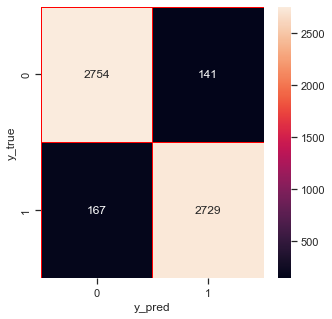

In [75]:
#confusion matrix visualization

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm2,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

it is good that our true negative and our true postive are high numbers, this means we are able to correctly know what is credit card fraud and what is not credit card fraud. the false negative being a low number is good , it does show we still get some predictions wrong but not that many. the false positive being a little higher but still not allot, is bad, even though its only a small amount these predictions are just completely incorrect.

Conclusion:

- The confusion matrix shows 2754 + 2729 = 5483 correct predictions and 167+141=308 incorrect ones.
- The accuracy score of the metrics is 94.6%.
- The main Cross validation score is 93.8%.

The Precision (about  96 percent) and Recall (approximately 94 percent) are also fairly high. This model can be used to detect fraud but it has a 4-6% chance of being wrong.

# Conclusions

between dataset 1 and dataset 2, they key difference was that one mainy contained number and the other various of categorical data(name, location,gender etc.). I wanted to see which one would perform better. I initially thought the numeric dataset would win, since machine learning is all about numbers, you would think it would be easier to perform better. but in the end:

## Dataset 1 highest accuracy score 93%

## Dataset 2 highest accuracy score 93%

while both performing pretty darn good, you cant beat a score of 99%. This is probably due to the fact that there was allot more data in dataset 2 even after resampling. This might be due to some sort of typo somewhere, probably me doing something wrong? but it increased the accuracy allot, so I cant really complain. Thank you for joining me in reading this super long document, I wish you a nice day.

Megin van Herk @Fontys